In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [166]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns # Import seaborn for better visualizations

In [167]:
data = pd.read_csv('./data/student/Student_Performance.csv')

In [168]:
list(data.columns)

['Hours Studied',
 'Previous Scores',
 'Extracurricular Activities',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [169]:
stats = data.describe()

In [170]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [171]:
data["Extracurricular Activities"]

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 10000, dtype: object

In [172]:
numeric_data = data.select_dtypes(include=np.number).dropna()

/var/folders/pw/ct2l9dz532s3m_xxwd5ngrth0000gn/T/ipykernel_94907/4131942727.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plt_data, labels=plt_data.columns,


<Figure size 1200x600 with 0 Axes>

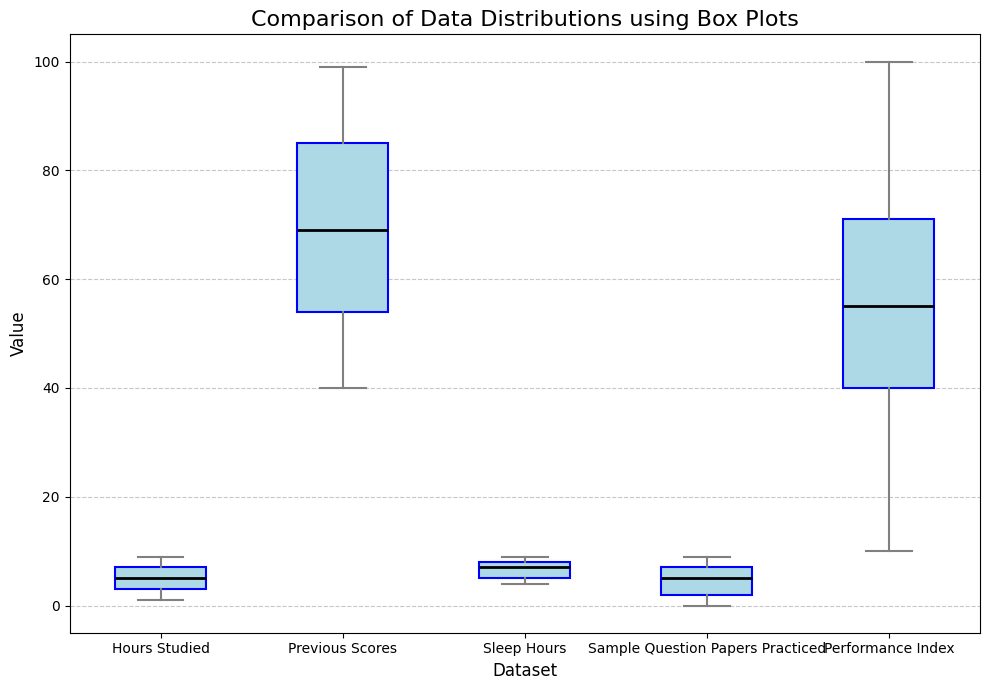

In [173]:
def box_plot_viz(plt_data):
     plt.figure(figsize=(12,6))
     fig, ax = plt.subplots(figsize=(10, 7))
     bp = ax.boxplot(plt_data, labels=plt_data.columns,
               vert=True,
                    patch_artist=True, # Fill boxes with color
                    medianprops=dict(color='black', linewidth=2), # Median line color and width
                    boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=1.5), # Box color and edge
                    whiskerprops=dict(color='gray', linewidth=1.5), # Whisker color and width
                    capprops=dict(color='gray', linewidth=1.5), # Cap color and width
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', markeredgecolor='black') # Outlier properties
                    )
     ax.set_title('Comparison of Data Distributions using Box Plots', fontsize=16)
     ax.set_xlabel('Dataset', fontsize=12)
     ax.set_ylabel('Value', fontsize=12)
     ax.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
     plt.tight_layout() # Adjust layout to prevent labels from overlapping
     plt.show()
box_plot_viz(numeric_data)

In [174]:
X_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
Y_columns = ['Performance Index']

In [175]:
X = numeric_data[X_columns]
Y = numeric_data[Y_columns]


In [176]:
# one hot encoding the categorical variable
categorical_cols_to_encode = ['Extracurricular Activities']
data_encoded = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True).replace({True: 1, False: 0})
data_encoded

/var/folders/pw/ct2l9dz532s3m_xxwd5ngrth0000gn/T/ipykernel_94907/815894088.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True).replace({True: 1, False: 0})


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [177]:
# 2. Create multiple subplots
# Determine the number of rows and columns for the subplot grid
def plot_line_viz(X_columns, Y_columns, data):
    features = X_columns.copy()
    target = Y_columns.copy()
    df = data.copy()
    num_features = len(features)
    n_cols = 2 # You can adjust the number of columns in the grid
    n_rows = (num_features + n_cols - 1) // n_cols # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    # 3. Iterate through each feature and plot its relationship with the target
    for i, feature in enumerate(features):
        ax = axes[i] # Get the current subplot axis

        # Create a scatter plot of the feature vs. the target
        sns.scatterplot(x=df[feature].values.flatten(), y=df[target].values.flatten(), ax=ax, alpha=0.7)

        # Add a regression line using seaborn's regplot (optional, but very informative)
        # This line shows the linear relationship that a simple linear regression would find
        sns.regplot(x=df[feature].values.flatten(), y=df[target].values.flatten(), ax=ax, scatter=False, color='red', line_kws={'linestyle':'--'}, label='Linear Trend')

        ax.set_title(f'{feature} vs. {target}', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel(target, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend() # Show the legend for the linear trend line

    # 4. Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

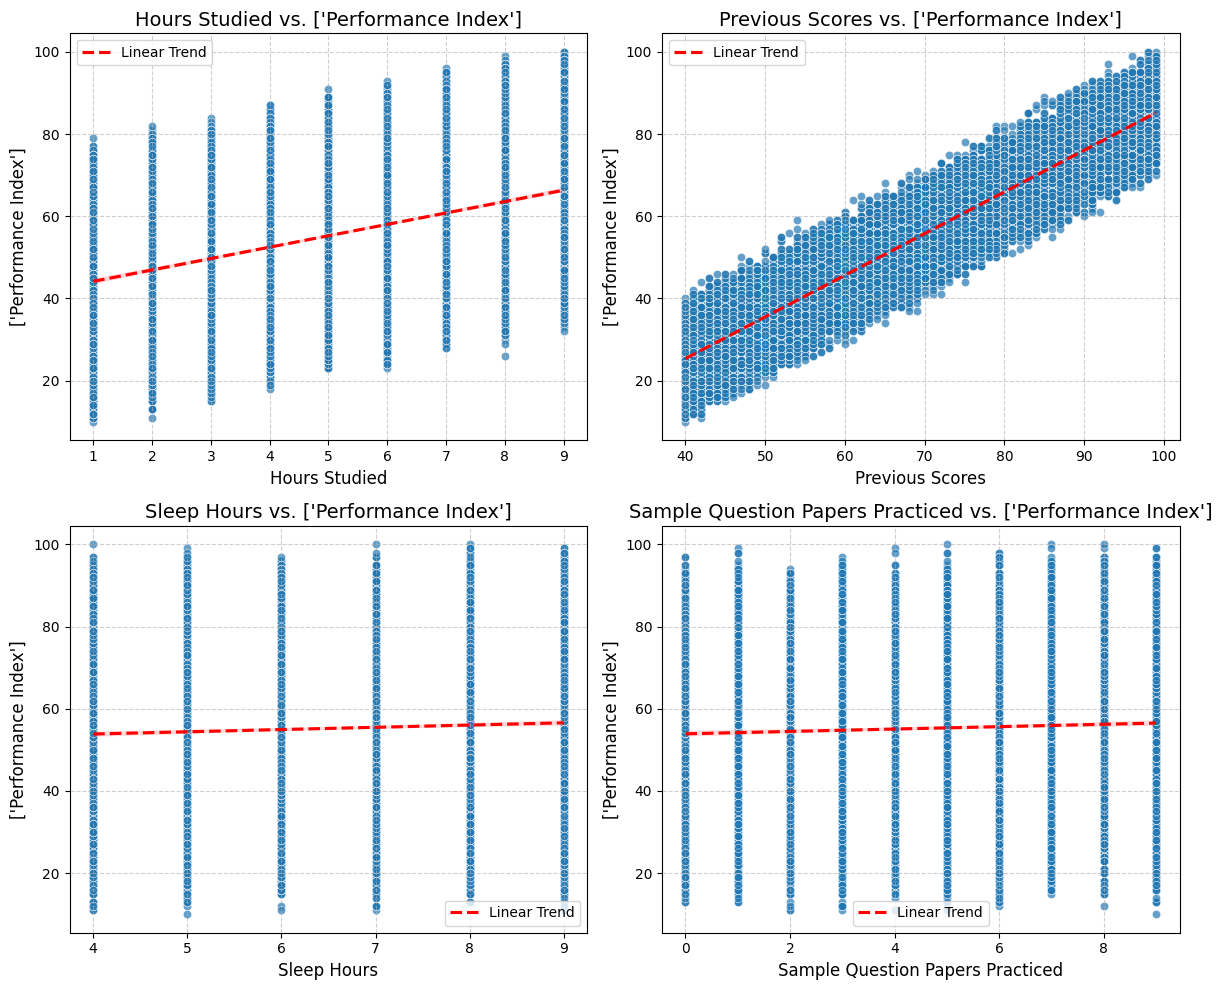

In [178]:
plot_line_viz(X_columns, Y_columns, numeric_data)

In [179]:
X_columns_w_cat = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes']
Y_columns_w_cat = ['Performance Index']

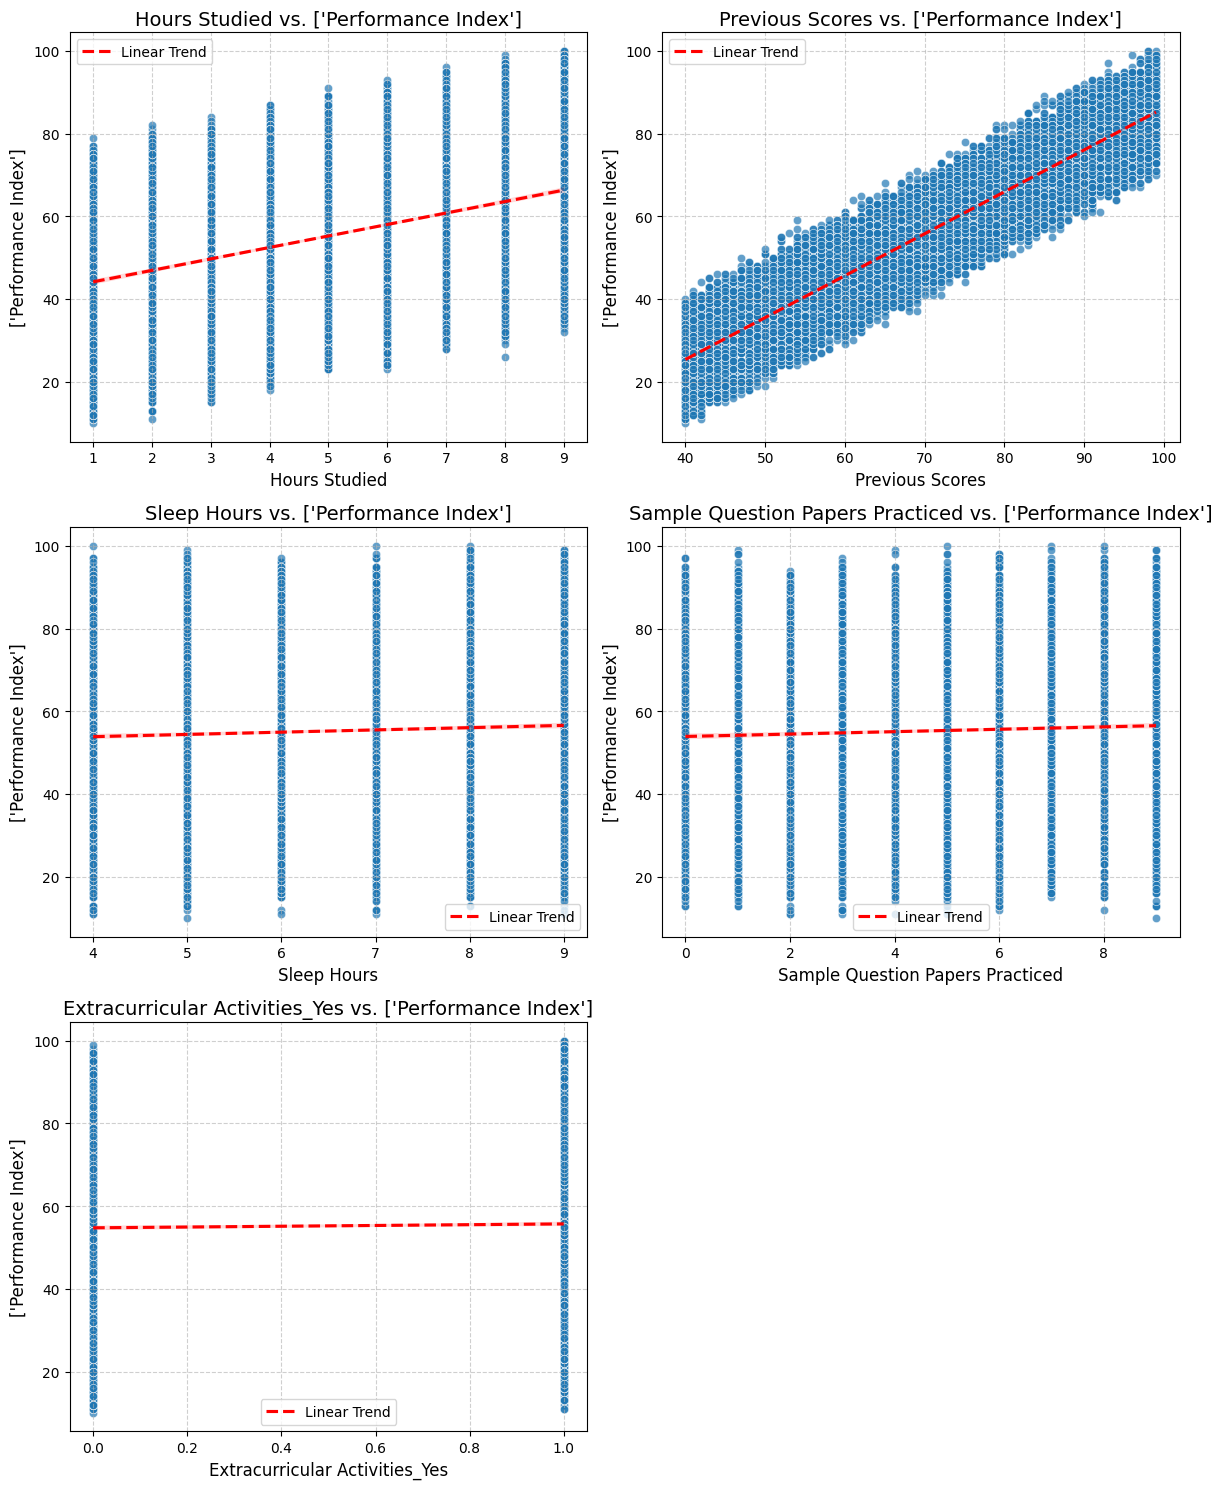

In [180]:
plot_line_viz(X_columns_w_cat, Y_columns_w_cat, data_encoded)

In [181]:
numeric_data.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


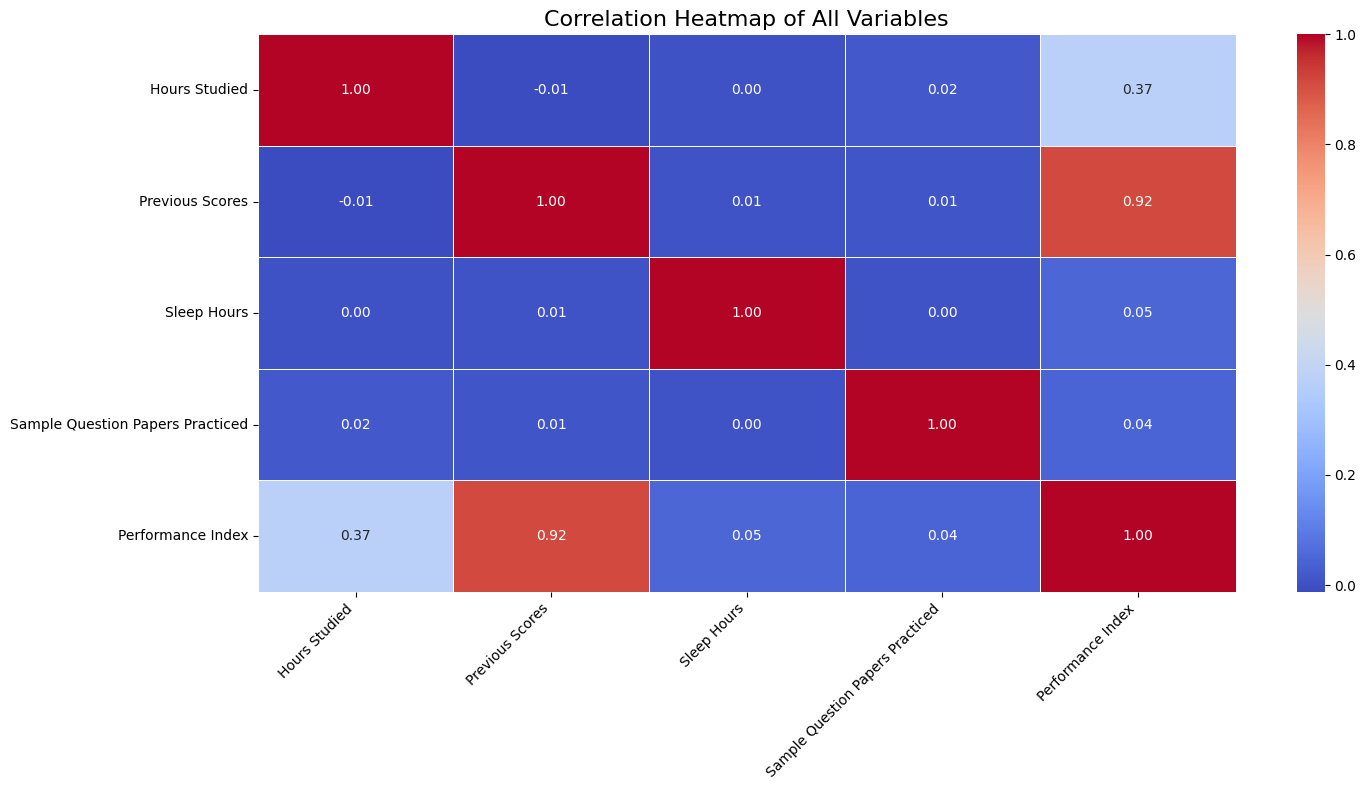

In [182]:
def heat_map_viz(plt_data):
    plt.figure(figsize=(15, 8)) # Set the figure size for better readability

    # Use seaborn.heatmap to create the correlation heatmap
    sns.heatmap(
        plt_data.corr(),
        annot=True,      # Show the correlation values on the heatmap
        cmap='coolwarm', # Color map (coolwarm is good for correlations, diverging from 0)
        fmt=".2f",       # Format annotations to 2 decimal places
        linewidths=.5    # Add lines between cells
    )

    plt.title('Correlation Heatmap of All Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)             # Keep y-axis labels horizontal
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

heat_map_viz(numeric_data)

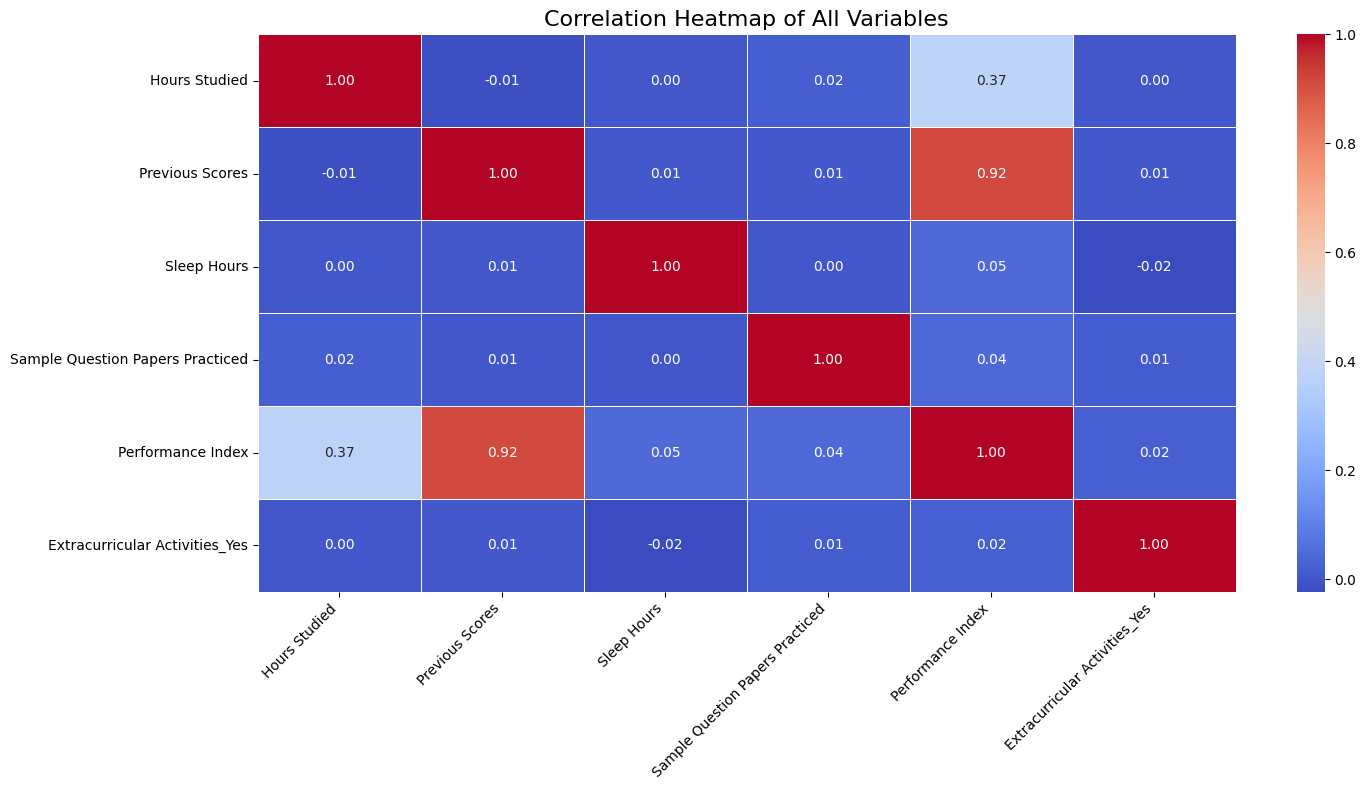

In [183]:
heat_map_viz(data_encoded)

In [184]:
# comment uncomment this to add remove categorical variable
# X = data_encoded[X_columns_w_cat]
# Y = data_encoded[Y_columns_w_cat]


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Do NOT fit again on X_test!

# X_train_scaled and X_test_scaled are now NumPy arrays.
# You can convert them back to DataFrames if you need column names for inspection:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

/var/folders/pw/ct2l9dz532s3m_xxwd5ngrth0000gn/T/ipykernel_94907/4131942727.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plt_data, labels=plt_data.columns,


<Figure size 1200x600 with 0 Axes>

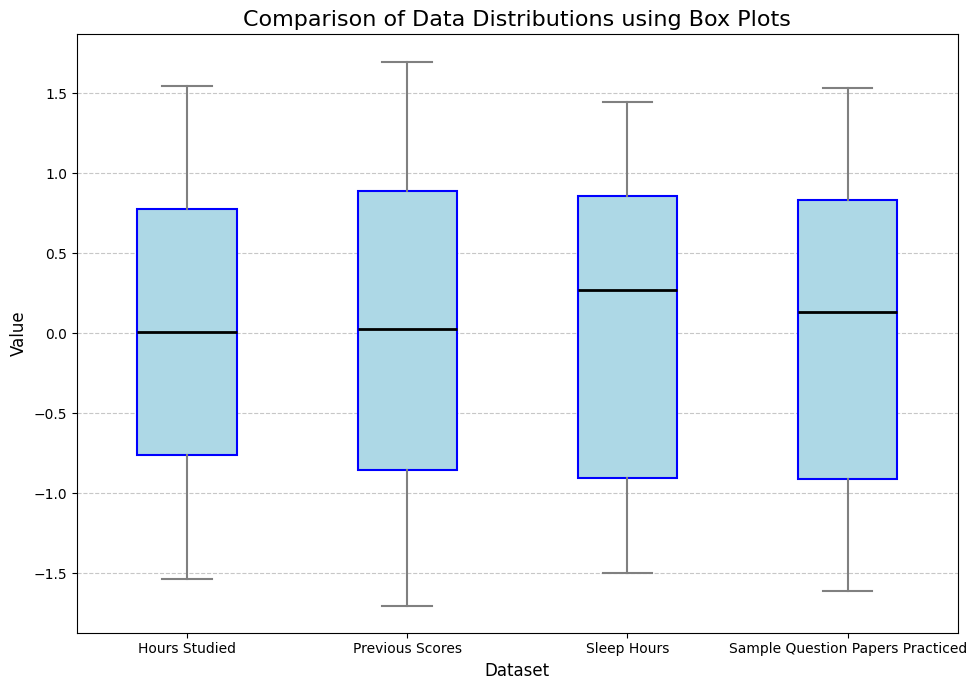

In [187]:
box_plot_viz(X_train_scaled_df)

In [188]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [189]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Learned Slope (Coefficient): {slope:.2f}")
print(f"Learned Intercept: {intercept:.2f}")

Learned Slope (Coefficient): 7.40
Learned Intercept: 55.31


In [190]:
# 7. Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [191]:
# 8. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE on Test Set (using scaled features): {rmse:.2f}")


RMSE on Test Set (using scaled features): 2.05


In [192]:

# --- IMPORTANT FIX: Ensure y_test and y_pred are 1D NumPy arrays ---
# y_test is a Pandas Series, convert to NumPy array and flatten
y_test_np = y_test.to_numpy().flatten()
# y_pred is already a NumPy array, just ensure it's flattened
y_pred_np = y_pred.flatten()

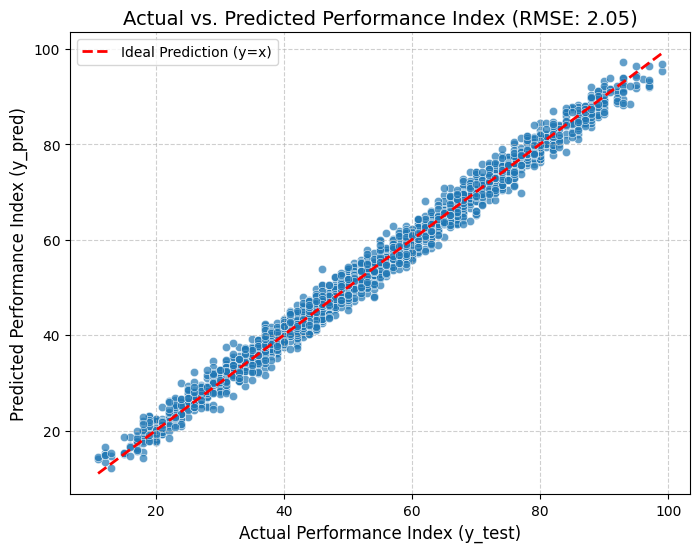

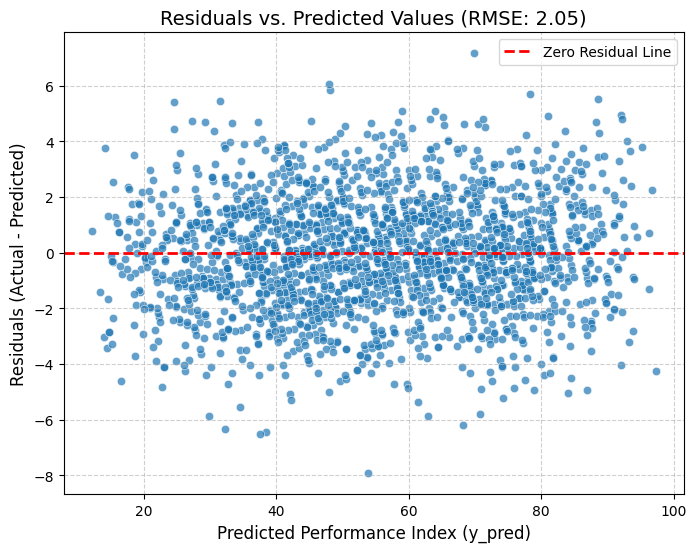

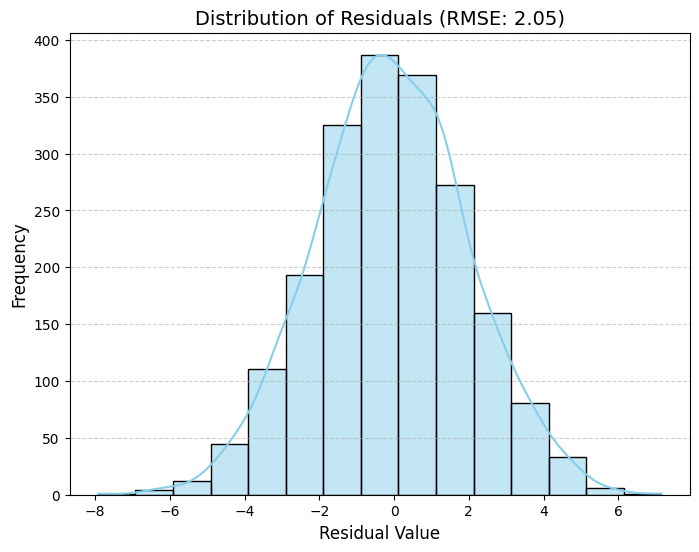

In [193]:
# 7. Create Visualization Plots

# Plot 1: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
# Use the explicitly 1D NumPy arrays for plotting
sns.scatterplot(x=y_test_np, y=y_pred_np, alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2, label='Ideal Prediction (y=x)') # Ideal line
plt.xlabel('Actual Performance Index (y_test)', fontsize=12)
plt.ylabel('Predicted Performance Index (y_pred)', fontsize=12)
plt.title(f'Actual vs. Predicted Performance Index (RMSE: {rmse:.2f})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Residuals vs. Predicted Values
residuals = y_test_np - y_pred_np # Calculate residuals using the 1D NumPy arrays
plt.figure(figsize=(8, 6))
# Use the explicitly 1D NumPy arrays for plotting
sns.scatterplot(x=y_pred_np, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Residual Line') # Zero line
plt.xlabel('Predicted Performance Index (y_pred)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title(f'Residuals vs. Predicted Values (RMSE: {rmse:.2f})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 3: Distribution of Residuals (Optional but good for checking normality)
plt.figure(figsize=(8, 6))
# Use the explicitly 1D NumPy array for plotting
sns.histplot(residuals, kde=True, bins=15, color='skyblue')
plt.xlabel('Residual Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Residuals (RMSE: {rmse:.2f})', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()